<a href="https://colab.research.google.com/github/SachinPrasanth777/PyTorch/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import helper
import torch

In [2]:
!pip install six

In [3]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets,transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    '''
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))

    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [9]:
#Trying out nn.Sequential instead of writing a class
import torch
from torch import nn
import torch.nn.functional as F
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()
dataiter = iter(trainloader)
images,labels = next(dataiter)
images = images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
print(loss)

tensor(2.3071, grad_fn=<NllLossBackward0>)


In [7]:
# feed forward neural network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
print(loss)

tensor(2.3022, grad_fn=<NllLossBackward0>)


In [8]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050,  0.0050],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0029, -0.0029, -0.0029,  ..., -0.0029, -0.0029, -0.0029],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [13]:
#Final Model - Implement Feed forwarding and back propogation
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.003)
epochs = 10
for e in range(epochs):
  running_loss = 0
  for image,labels in trainloader:
    images = image.view(image.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9233928124533533
Training loss: 0.8724697359652915
Training loss: 0.5417731401445006
Training loss: 0.44101229762789534
Training loss: 0.39421809997671703
Training loss: 0.3656476435027143
Training loss: 0.34552027578197564
Training loss: 0.33020948199257416
Training loss: 0.3178212434482346
Training loss: 0.30725836807857954


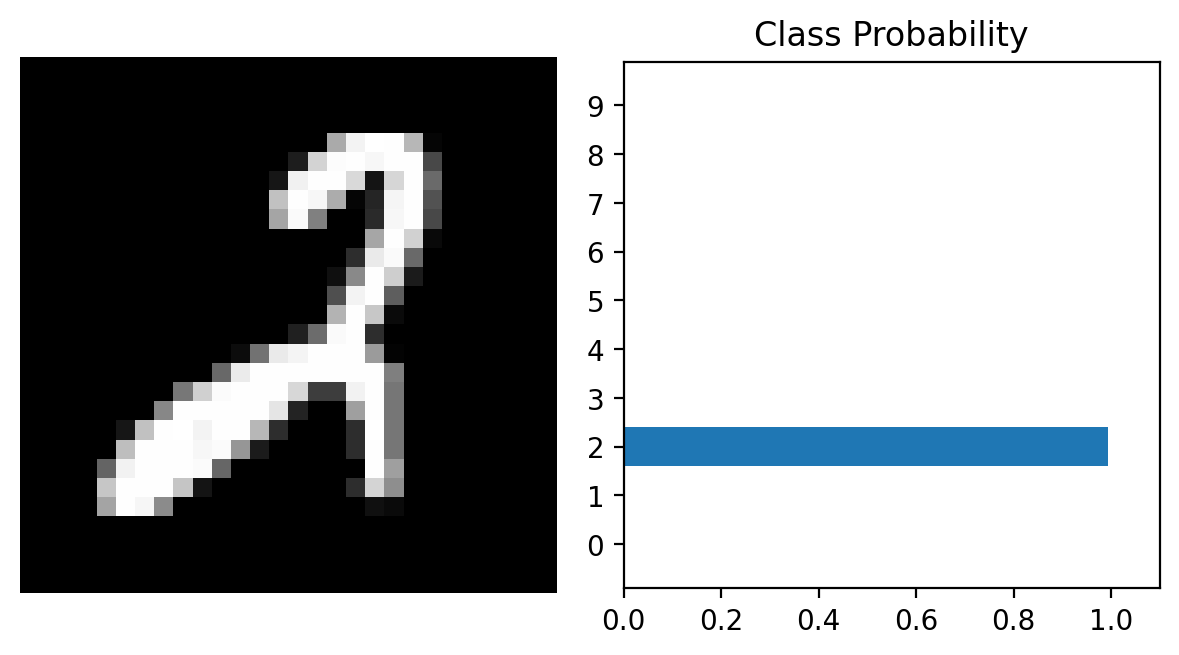

In [15]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)